In [2]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import model_selection

In [3]:
df = pd.read_csv('data/train.csv')
df = df.dropna()
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_acc,initial_list_status,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,record_id
3,4200.0,36 months,13.33,142.19,C,C3,Receptionist,< 1 year,MORTGAGE,21600.0,...,19.0,w,0.0,1.0,INDIVIDUAL,0.0,165.0,28187.0,14500.0,453447199
7,14000.0,36 months,15.31,487.45,C,C2,Department of the Army,10+ years,MORTGAGE,96000.0,...,29.0,f,0.0,1.0,INDIVIDUAL,0.0,0.0,276267.0,39700.0,453322484
12,20000.0,36 months,11.99,664.20,B,B3,"Sr. Specialist, Tax",10+ years,RENT,110000.0,...,35.0,f,0.0,1.0,INDIVIDUAL,0.0,0.0,41806.0,54600.0,453423047
16,8650.0,36 months,12.12,287.80,B,B3,Haven Hospice,8 years,RENT,76000.0,...,20.0,f,0.0,1.0,INDIVIDUAL,0.0,0.0,614403.0,10000.0,453286318
17,25000.0,60 months,17.27,624.95,C,C5,Cheney Public Schools,6 years,MORTGAGE,108000.0,...,40.0,f,0.0,1.0,INDIVIDUAL,0.0,0.0,337866.0,23800.0,453277374


In [39]:
data = df.drop(['emp_title', 'home_ownership', 'pymnt_plan','record_id', 'earliest_cr_line', 'grade', 'sub_grade', 'application_type', 'issue_d', 'zip_code', 'policy_code', 'verification_status', 'purpose', 'initial_list_status', 'addr_state','emp_length','term'], axis=1)

data['loan_amnt'] = data['loan_amnt'].astype(float)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69010 entries, 3 to 200188
Data columns (total 19 columns):
loan_amnt                     69010 non-null float64
int_rate                      69010 non-null float64
installment                   69010 non-null float64
annual_inc                    69010 non-null float64
loan_status                   69010 non-null int64
dti                           69010 non-null float64
delinq_2yrs                   69010 non-null float64
inq_last_6mths                69010 non-null float64
mths_since_last_delinq        69010 non-null float64
open_acc                      69010 non-null float64
pub_rec                       69010 non-null float64
revol_bal                     69010 non-null float64
revol_util                    69010 non-null float64
total_acc                     69010 non-null float64
collections_12_mths_ex_med    69010 non-null float64
acc_now_delinq                69010 non-null float64
tot_coll_amt                  69010 non-null

In [41]:
array = data.values
Y = data['loan_status'].values

X = data.drop(['loan_status'], axis=1)

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=7)

In [42]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty = 'l1')
classifier.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [43]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(penalty = 'l2')
classifier1.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [44]:
y_pred = classifier.predict(x_test)

In [45]:
y_pred1 = classifier1.predict(x_test)

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm1 = confusion_matrix(y_test,y_pred1)

In [47]:
cm

array([[  293,  2978],
       [  270, 10261]], dtype=int64)

In [48]:
cm1

array([[   38,  3233],
       [   40, 10491]], dtype=int64)

In [52]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7646717866975801
Precision: 0.7750585391645894
Recall: 0.974361409172918


In [53]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))
print("Precision:",metrics.precision_score(y_test, y_pred1))
print("Recall:",metrics.recall_score(y_test, y_pred1))

Accuracy: 0.7628604550065208
Precision: 0.7644272806761877
Recall: 0.9962016902478397


In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.09      0.15      3271
           1       0.78      0.97      0.86     10531

   micro avg       0.76      0.76      0.76     13802
   macro avg       0.65      0.53      0.51     13802
weighted avg       0.71      0.76      0.69     13802



In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.49      0.01      0.02      3271
           1       0.76      1.00      0.87     10531

   micro avg       0.76      0.76      0.76     13802
   macro avg       0.63      0.50      0.44     13802
weighted avg       0.70      0.76      0.67     13802



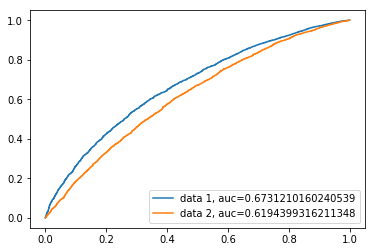

In [51]:
y_pred_proba = classifier.predict_proba(x_test)[::,1]
y_pred_proba1 = classifier1.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba1)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba1)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot(fpr1,tpr1,label="data 2, auc="+str(auc1))
plt.legend(loc=4)
plt.show()